In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict 
from tqdm import tqdm

# Simulation environment

In [101]:
"""
Definition of the Warehouse Agent environment
"""

class WarehouseAgent():
    def __init__(self):
        """
        Initializing the environment

        """
        self.GRID_DIM = np.array([6,7])
        self.agent_position = np.array([1,2])
        self.box_location = np.array([4,3])
        self.goal_location = np.array([3,1])
        self.action_convert={0:[0,1],1:[0,-1],2:[-1,0],3:[1,0]}
        self.wall=[[0,1],[0,2],[0,3],[0,0],[1,0],[2,0],[3,0],[4,0],[5,0],[6,0],[1,3],[2,3],[2,4],[2,5],[3,5],[4,5],[5,5],[5,3],[5,4],[6,1],[6,2],[6,3]]
        self.stuck_locations=[[1,1],[1,2],[3,4],[4,4],[5,1],[5,2]]
        self.done=False
     
    def reset(self):
        """
        Function to reset the environment at the end of each episode to its initial state configuration
        Returns:
            state: the state of the environment reset to its initial conditions
        """
        self.agent_position = np.array([1,2])
        self.box_location = np.array([4,3])
        self.goal_location = np.array([3,1])
        self.done=False

        return(self.agent_position,self.done)

    def step(self, action):
          """Function to control and evaluate the agents' action
          Args:
              action: pass on the action which the agent needs to take at that time step
          Returns:
              new_state: the new state agent reaches after taking the action
              reward: the reward obtained on taking the action
              done: boolean value to determine if episode terminating condition is reached
          """
          cur_action=np.array(self.action_convert[action])
          new_state=self.agent_position+cur_action
          #print(new_state,self.agent_position)


          if list(new_state) in self.wall:
            #self.agent_position=new_state
            return(self.agent_position,-1,False)
          else:
            #print("-------------")
            if list(new_state)==list(self.box_location):
              box_new_location=self.box_location+cur_action
              if list(box_new_location) in self.wall:
                return(self.agent_position,-1,False)
              else:
                self.box_location=box_new_location
                self.agent_position=new_state
                if list(self.box_location)==list(self.goal_location):
                  self.done=True
                  return(self.agent_position,0,True)
                else:
                  if list(self.box_location) not in self.stuck_locations:
                    return(self.agent_position,-1,False)
                  else:
                    self.done=True
                    return(self.agent_position,-1,True)
            else:
              #print("free")
              self.agent_position=new_state
              return(self.agent_position,-1,False)
    
  

    def render(self):
        """Function to get the simulation of the warehouse agent system
        """
        plt.figure(figsize=(3,3))
        agent_y=7-self.agent_position[0]-1
        agent_x=self.agent_position[1]
        box_x=self.box_location[1]
        box_y=7-self.box_location[0]-1
        end_loc_x=self.goal_location[1]
        end_loc_y=7-self.goal_location[0]-1

        plt.annotate("End",xy=(end_loc_x,end_loc_y))
        plt.annotate("Box",xy=(box_x,box_y))
        plt.annotate("Agent",xy=(agent_x,agent_y))
        plt.scatter(agent_x,agent_y,color="blue")
        plt.scatter(box_x,box_y,color="yellow")
        plt.scatter(end_loc_x,end_loc_y,color="red")

        plt.plot([1-0.5,1-0.5],[1-0.5,6-0.5],color="black")
        plt.plot([1-0.5,3-0.5],[1-0.5,1-0.5],color="black")
        plt.plot([3-0.5,3-0.5],[1-0.5,2-0.5],color="black")
        plt.plot([3-0.5,5-0.5],[2-0.5,2-0.5],color="black")
        plt.plot([5-0.5,5-0.5],[2-0.5,4-0.5],color="black")
        plt.plot([5-0.5,3-0.5],[4-0.5,4-0.5],color="black")
        plt.plot([3-0.5,3-0.5],[4-0.5,6-0.5],color="black")
        plt.plot([1-0.5,3-0.5],[6-0.5,6-0.5],color="black")

        plt.xlim(-0.1,7)
        plt.ylim(-0.1,7)

        plt.show()
          

In [102]:
agent=WarehouseAgent()
agent.agent_position=np.array([1,2])

In [103]:
agent.step(0)

(array([1, 2]), -1, False)

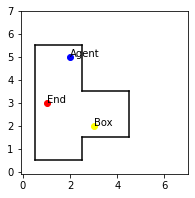

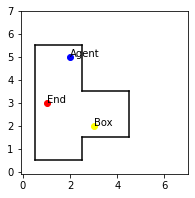

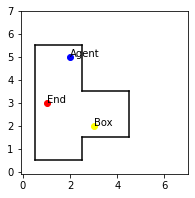

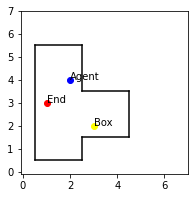

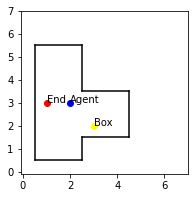

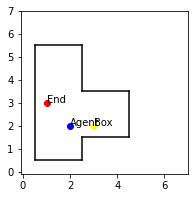

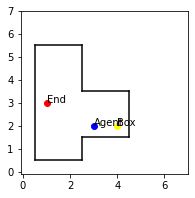

In [104]:
start,done=agent.reset()
while done==False:
  action=random.sample([0,1,2,3],1)[0]
  agent_loc,reward,done=agent.step(action)
  #print(agent_loc)
  agent.render()

# Base functions


1.   epsilon-greedy policy
2.   episode generator
3.   greedy policy
4.   plotter function



In [97]:
def epsilon_greedy_policy(epsilon,state):
  if random.random()<epsilon:
    return random.sample([0,1,2,3],1)[0]
  else:
    max=-1000000000
    max_index=0.0
    for i in q.keys():
      if (i[0]==state[0] and i[1]==state[1]):
        if np.real(q[i])>max:
          max=np.real(q[i])
          max_index=i[2]
    return max_index

In [98]:
def generate_episode(epsilon):
  states=[]
  rewards=[]
  actions=[]
  state,done=env.reset()
  episode_length=50
  epi_cur_length=0
  while done!=True:
    states.append(state)
    action=epsilon_greedy_policy(epsilon,state)
    actions.append(action)
    state,reward,done=env.step(action)
    rewards.append(reward)
    epi_cur_length+=1
    if epi_cur_length==episode_length:
      break
  return states,actions,rewards

In [99]:
def greedy_policy(state):
  max=-1000000000
  max_index=0.0
  for i in q.keys():
    if (i[0]==state[0] and i[1]==state[1]):
      if q[i]>max:
        max=q[i]
        max_index=i[2]
  return max_index

In [100]:
def plotter(arr,range1=1000):
  arr_end=[]
  for i in range(0,len(arr)-range1,range1):
    arr_end.append(np.mean(arr[i:i+range1]))
  return arr_end

# 1. On-Policy Monte Carlo

In [105]:
states=(6,5)
actions=4
q=defaultdict(float)
for x in range(states[0]):
  for y in range(states[1]):
    for a in range(actions):
      q[(x,y,a)]=random.random()

In [106]:
env=WarehouseAgent()
epsilon=1.0

In [107]:
rewards_plotting=[]

In [108]:
N=defaultdict(int)
n_episodes=80000
epsilon=1.0
gamma=0.99
for episode_no in range(n_episodes):
  epsilon=epsilon*0.9999
  states,actions,rewards=generate_episode(max(0.5,epsilon))
  returns=0
  for t in range(len(states)-1,-1,-1):
    #print(t)
    R=rewards[t]
    S=states[t]
    returns+=R*gamma
    N[tuple(S)]+=1
    q[(S[0],S[1],actions[t])]+=(returns-q[(S[0],S[1],actions[t])])/N[tuple(S)]
  rewards_plotting.append(R)

Text(0, 0.5, 'Average Reward')

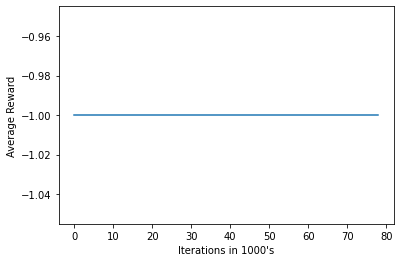

In [109]:
plt.plot(plotter(rewards_plotting,1000))
plt.xlabel("Iterations in 1000's")
plt.ylabel("Average Reward")

[2 2] 3 -1


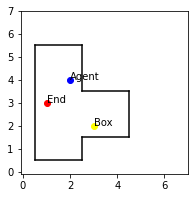

[3 2] 3 -1


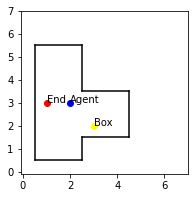

[4 2] 3 -1


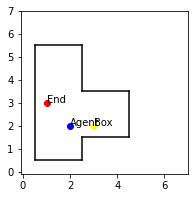

[4 3] 0 -1


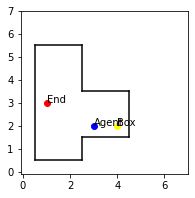

In [ ]:
agent=WarehouseAgent()
state,done=agent.reset()
while done==False:
  action=greedy_policy(state)
  state,reward,done=agent.step(action)
  print(state,action,reward)
  agent.render()

In [ ]:
q

defaultdict(float,
            {(0, 0, 0): 0.7441632052523599,
             (0, 0, 1): 0.290076867056535,
             (0, 0, 2): 0.14645153664141297,
             (0, 0, 3): 0.7832117479511245,
             (0, 1, 0): 0.9589168320463739,
             (0, 1, 1): 0.3074441154162487,
             (0, 1, 2): 0.6213335068230909,
             (0, 1, 3): 0.1674658369668508,
             (0, 2, 0): 0.10025425029957569,
             (0, 2, 1): 0.49227534615473856,
             (0, 2, 2): 0.33452122280575436,
             (0, 2, 3): 0.2329011830719414,
             (0, 3, 0): 0.6514032317762848,
             (0, 3, 1): 0.07925054123385356,
             (0, 3, 2): 0.25886859981080423,
             (0, 3, 3): 0.8525769372581826,
             (0, 4, 0): 0.2579704401283607,
             (0, 4, 1): 0.8605281082237863,
             (0, 4, 2): 0.3928493123025625,
             (0, 4, 3): 0.44964532118252243,
             (1, 0, 0): 0.27509238399602765,
             (1, 0, 1): 0.769822636429961,
       

Text(0, 0.5, 'Average Reward')

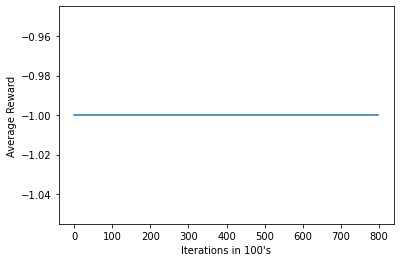

In [ ]:
plt.plot(plotter(rewards_plotting,100))
plt.xlabel("Iterations in 100's")
plt.ylabel("Average Reward")

# 2. Off-Policy Monte Carlo

In [110]:
states=(6,5)
actions=4
q=defaultdict(float)
c=defaultdict(float)
for x in range(states[0]):
  for y in range(states[1]):
    for a in range(actions):
      q[(x,y,a)]=random.random()
      c[(x,y,a)]=0.0

In [111]:
env=WarehouseAgent()
rewards_plotting=[]

In [112]:
N=defaultdict(int)
n_episodes=5000
epsilon=1.0
discount_factor=0.98
w=1
for episode_no in range(n_episodes):
  states,actions,rewards=generate_episode(epsilon*(1-episode_no/n_episodes))
  returns=0
  for t in range(len(states)-1,-1,-1):
    #print(t)
    R=rewards[t]
    S=states[t]
    returns=R+(returns*discount_factor)
    N[tuple(S)]+=1
    c[(S[0],S[1],actions[t])]+=w
    q[(S[0],S[1],actions[t])]+=(returns-q[(S[0],S[1],actions[t])]) * (w/c[(S[0],S[1],actions[t])])  #* (1/N[tuple(S)])
    rewards_plotting.append(returns)
    if actions[t]!=greedy_policy(S):
      break
    w=w*1/0.2         # random policy probability is 0.2 for a action given a state

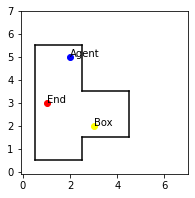

[1 2] 0.0


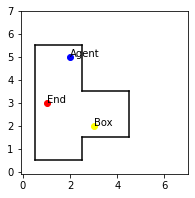

[1 2] 0.0


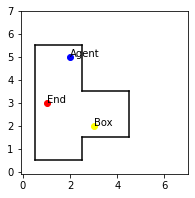

[1 2] 0.0


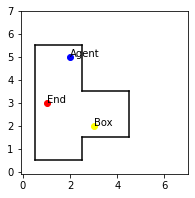

[1 2] 0.0


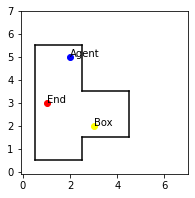

[1 2] 0.0


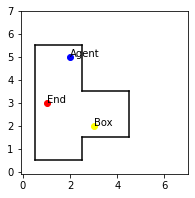

[1 2] 0.0


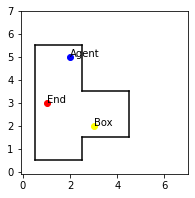

[1 2] 0.0


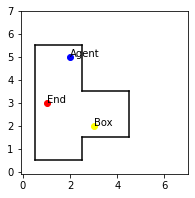

[1 2] 0.0


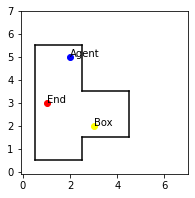

[1 2] 0.0


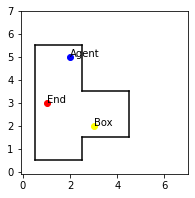

[1 2] 0.0


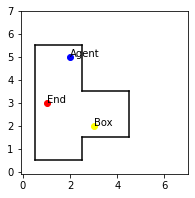

[1 2] 0.0


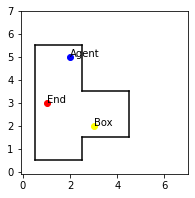

[1 2] 0.0


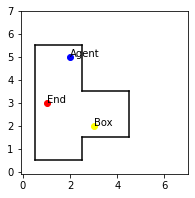

[1 2] 0.0


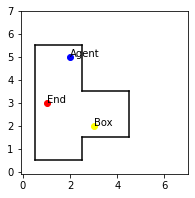

[1 2] 0.0


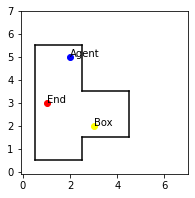

[1 2] 0.0


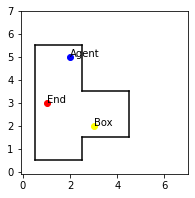

[1 2] 0.0


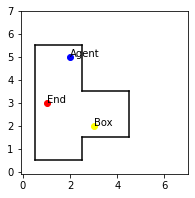

[1 2] 0.0


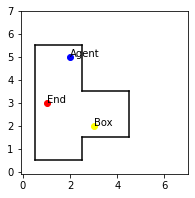

[1 2] 0.0


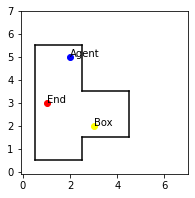

[1 2] 0.0


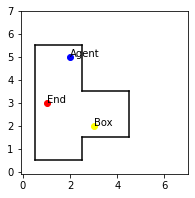

[1 2] 0.0


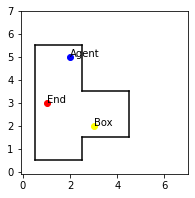

[1 2] 0.0


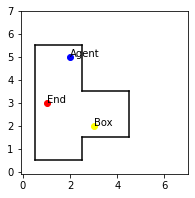

[1 2] 0.0


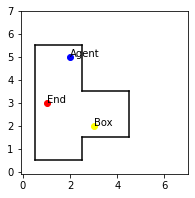

[1 2] 0.0


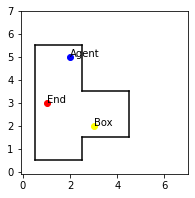

[1 2] 0.0


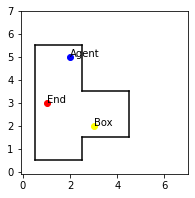

[1 2] 0.0


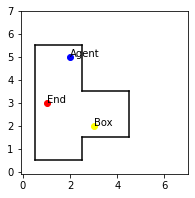

[1 2] 0.0


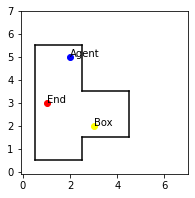

[1 2] 0.0


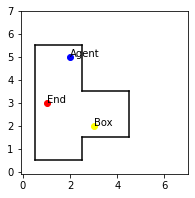

[1 2] 0.0


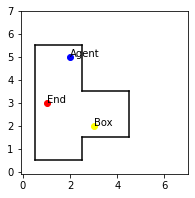

[1 2] 0.0


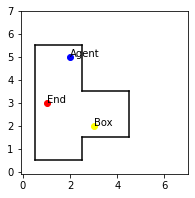

[1 2] 0.0


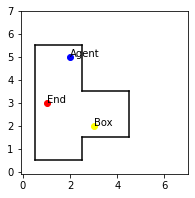

[1 2] 0.0


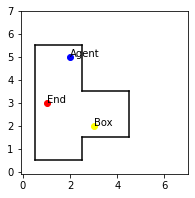

[1 2] 0.0


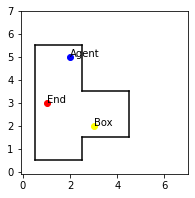

[1 2] 0.0


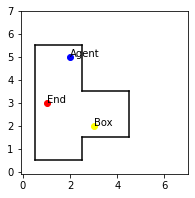

[1 2] 0.0


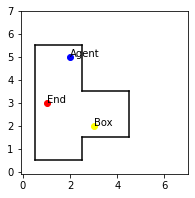

[1 2] 0.0


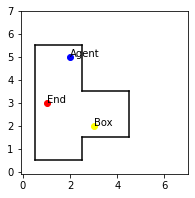

[1 2] 0.0


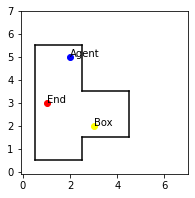

[1 2] 0.0


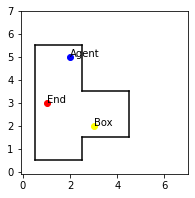

[1 2] 0.0


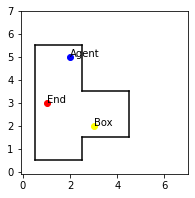

[1 2] 0.0


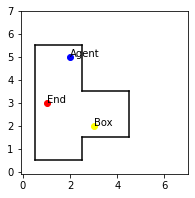

[1 2] 0.0


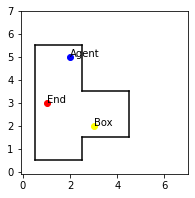

[1 2] 0.0


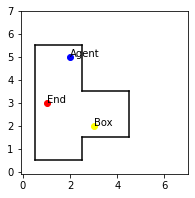

[1 2] 0.0


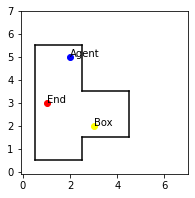

[1 2] 0.0


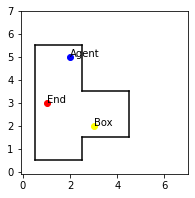

[1 2] 0.0


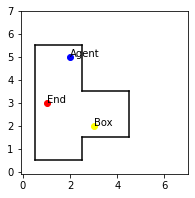

[1 2] 0.0


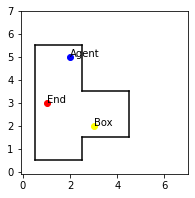

[1 2] 0.0


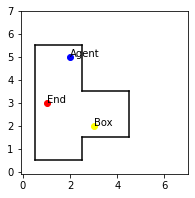

[1 2] 0.0


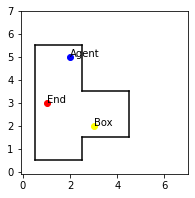

[1 2] 0.0


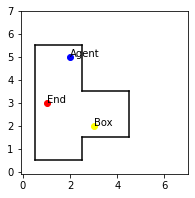

[1 2] 0.0


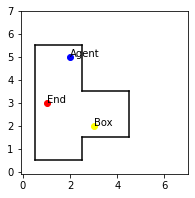

[1 2] 0.0


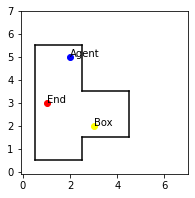

[1 2] 0.0


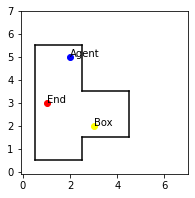

[1 2] 0.0


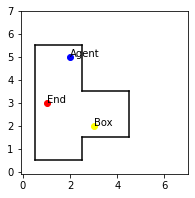

[1 2] 0.0


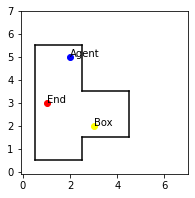

[1 2] 0.0


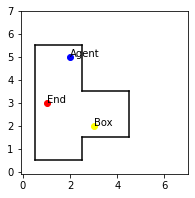

[1 2] 0.0


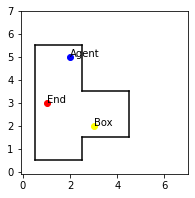

[1 2] 0.0


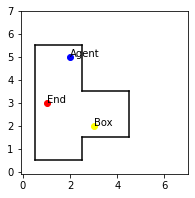

[1 2] 0.0


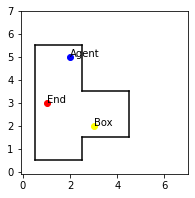

[1 2] 0.0


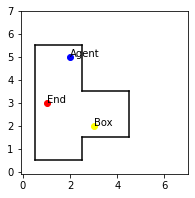

[1 2] 0.0


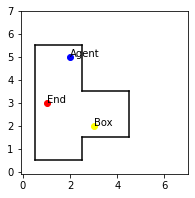

[1 2] 0.0


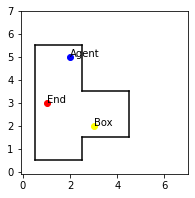

[1 2] 0.0


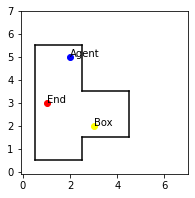

[1 2] 0.0


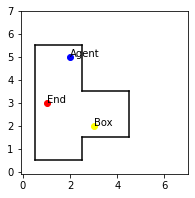

[1 2] 0.0


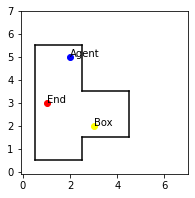

[1 2] 0.0


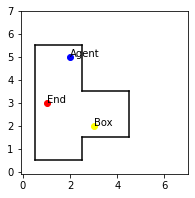

[1 2] 0.0


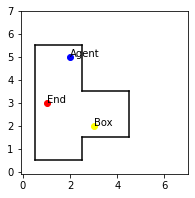

[1 2] 0.0


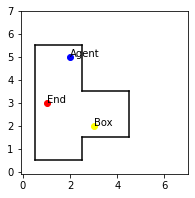

[1 2] 0.0


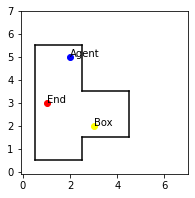

[1 2] 0.0


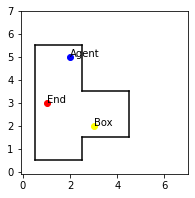

[1 2] 0.0


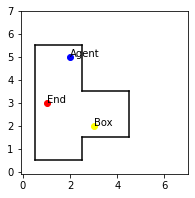

[1 2] 0.0


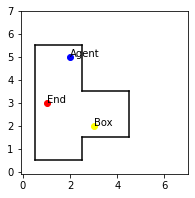

[1 2] 0.0


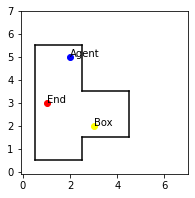

[1 2] 0.0


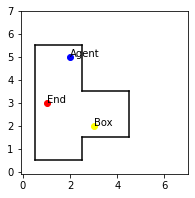

[1 2] 0.0


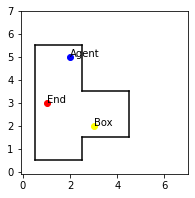

[1 2] 0.0


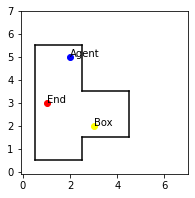

[1 2] 0.0


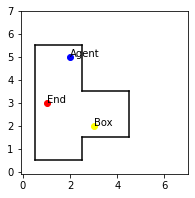

[1 2] 0.0


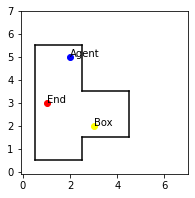

[1 2] 0.0


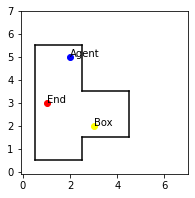

[1 2] 0.0


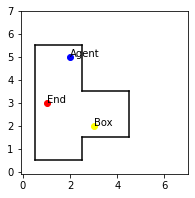

[1 2] 0.0


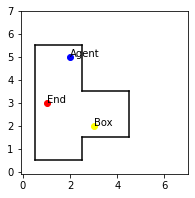

[1 2] 0.0


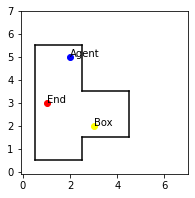

[1 2] 0.0


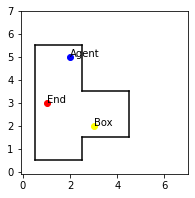

[1 2] 0.0


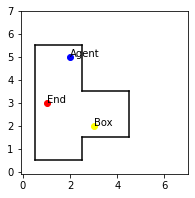

[1 2] 0.0


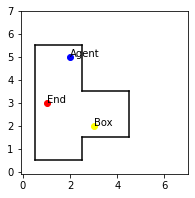

[1 2] 0.0


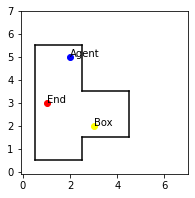

[1 2] 0.0


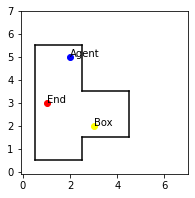

[1 2] 0.0


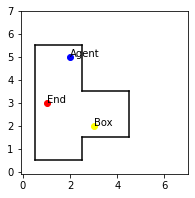

[1 2] 0.0


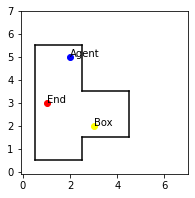

[1 2] 0.0


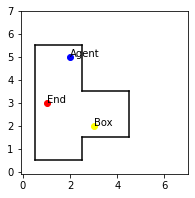

[1 2] 0.0


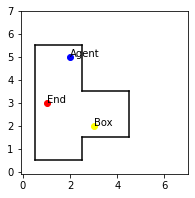

[1 2] 0.0


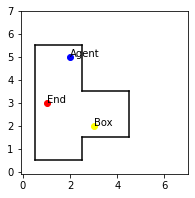

[1 2] 0.0


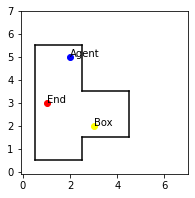

[1 2] 0.0


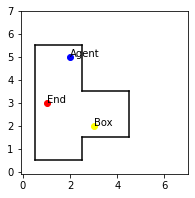

[1 2] 0.0


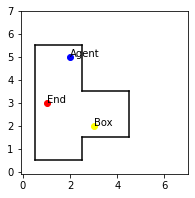

[1 2] 0.0


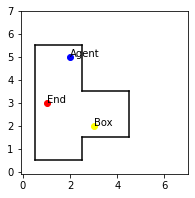

[1 2] 0.0


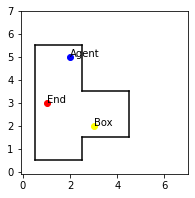

[1 2] 0.0


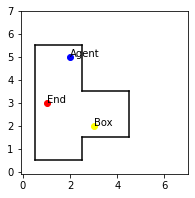

[1 2] 0.0


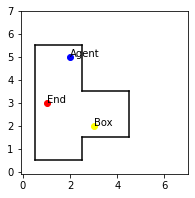

[1 2] 0.0


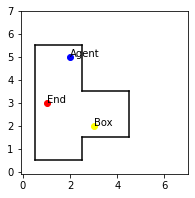

[1 2] 0.0


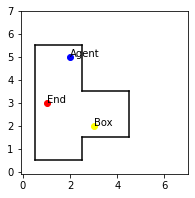

[1 2] 0.0


In [113]:
agent=WarehouseAgent()
state,done=agent.reset()
n=1
while done==False:
  action=greedy_policy(state)
  state,reward,done=agent.step(action)
  agent.render()
  print(state,action)
  n+=1
  if n>100:
    break

Text(0, 0.5, 'Average Reward')

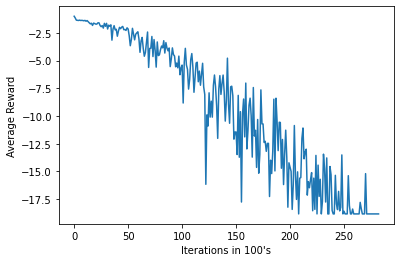

In [115]:
plt.plot(plotter(rewards_plotting,100))
plt.xlabel("Iterations in 100's")
plt.ylabel("Average Reward")

#3. On-Policy TD Control (SARSA)

In [116]:
states=(6,5)
actions=4
q=defaultdict(float)
for x in range(states[0]):
  for y in range(states[1]):
    for a in range(actions):
      q[(x,y,a)]=random.random()

In [117]:
alpha=0.01
gamma=0.97
no_episodes=40000
epsilon=1.0
env=WarehouseAgent()
rewards_plotting=[]

In [ ]:
for episode in range(no_episodes):
  state,done=env.reset()
  action=epsilon_greedy_policy(epsilon*(1-episode/no_episodes),state)
  state,reward,done=env.step(action)
  while done==False:
    next_action=epsilon_greedy_policy(epsilon,state)
    next_state,next_reward,done=env.step(action)
    q[(state[0],state[1],action)]+=alpha*(reward+gamma*(q[(next_state[0],next_state[1],next_action)]-q[(state[0],state[1],action)]))
    state,reward,action=next_state,next_reward,next_action
    rewards_plotting.append(reward)

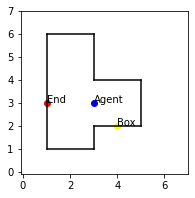

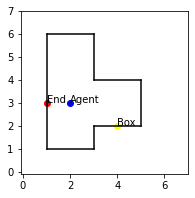

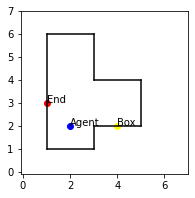

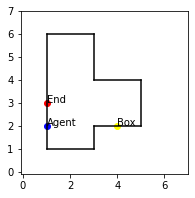

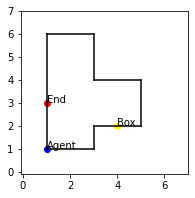

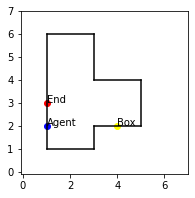

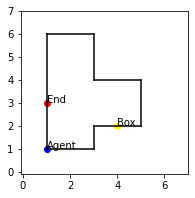

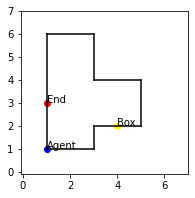

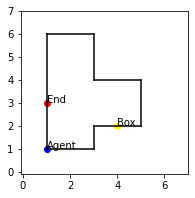

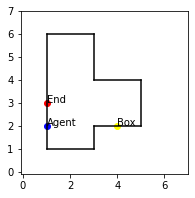

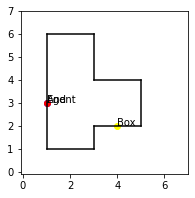

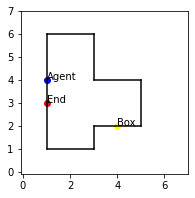

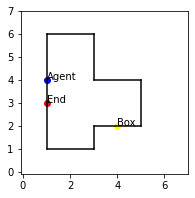

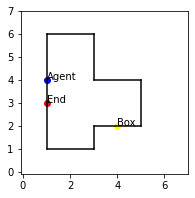

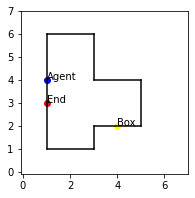

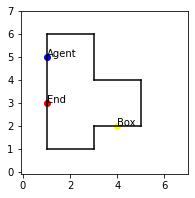

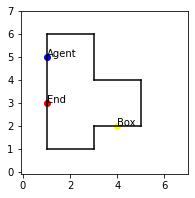

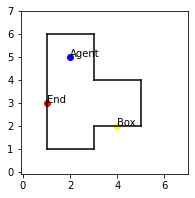

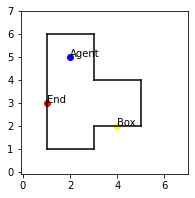

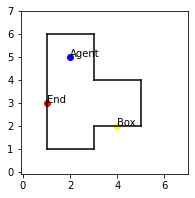

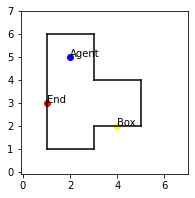

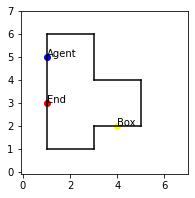

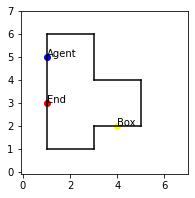

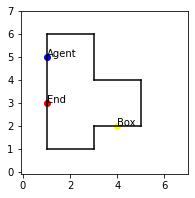

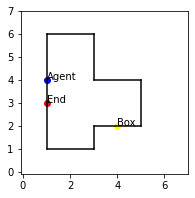

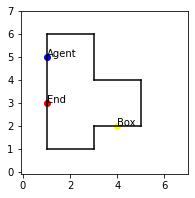

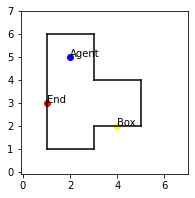

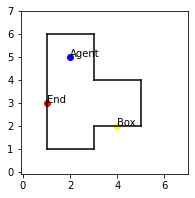

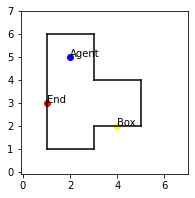

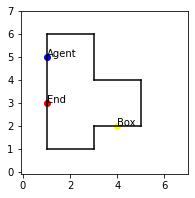

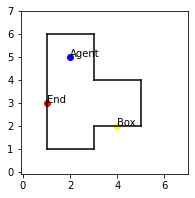

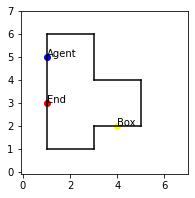

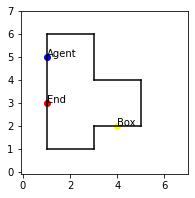

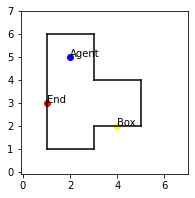

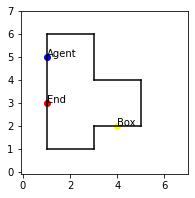

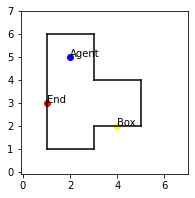

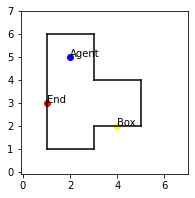

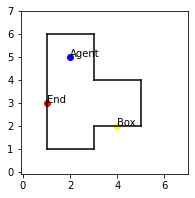

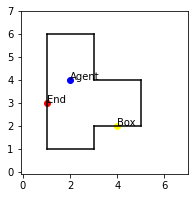

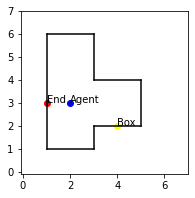

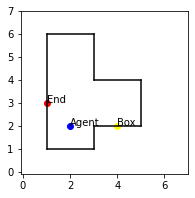

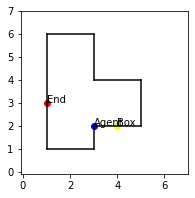

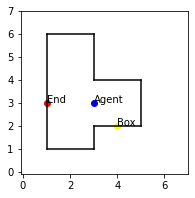

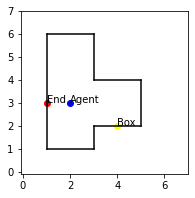

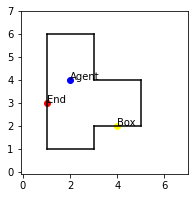

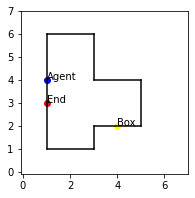

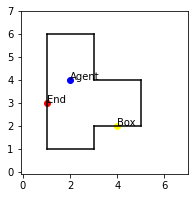

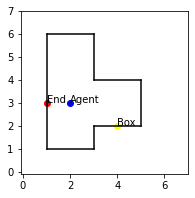

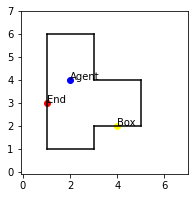

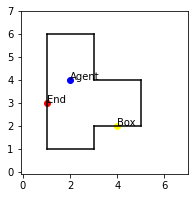

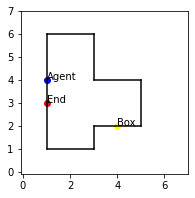

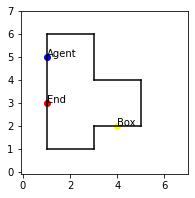

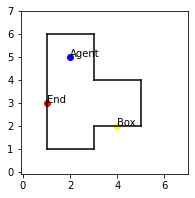

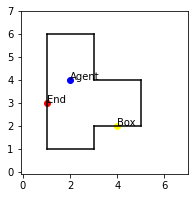

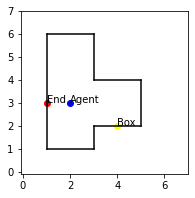

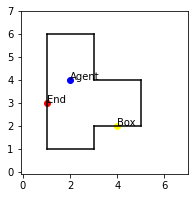

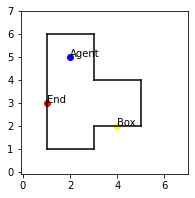

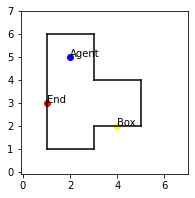

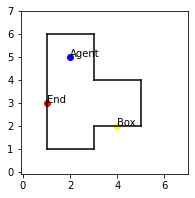

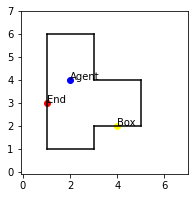

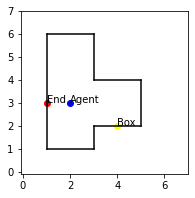

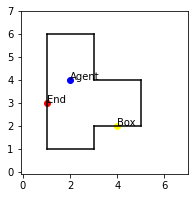

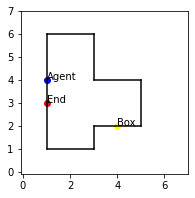

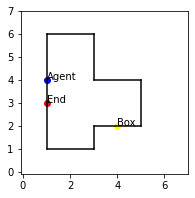

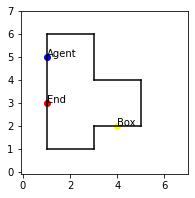

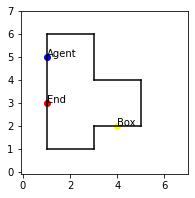

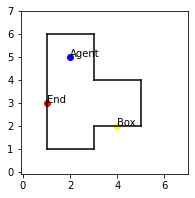

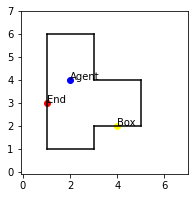

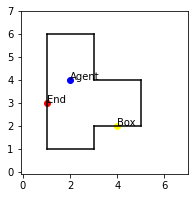

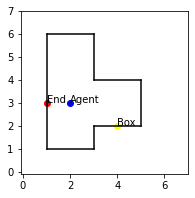

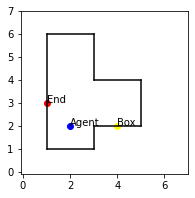

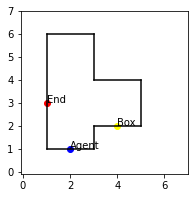

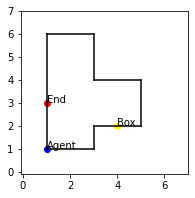

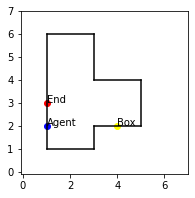

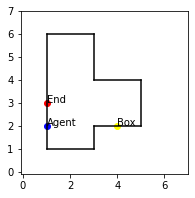

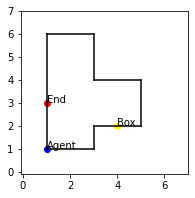

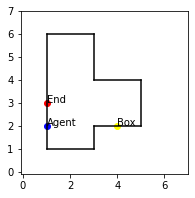

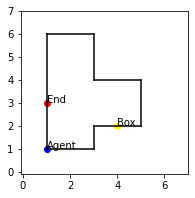

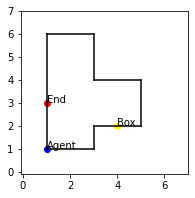

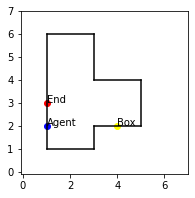

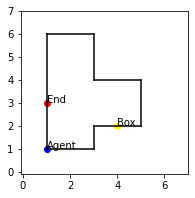

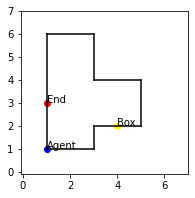

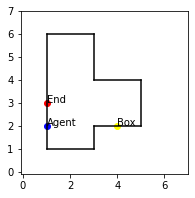

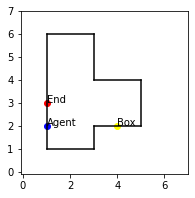

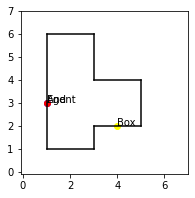

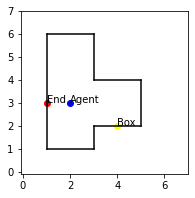

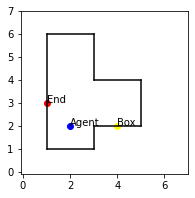

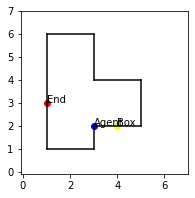

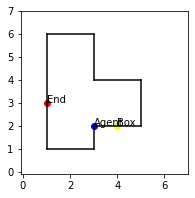

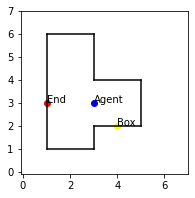

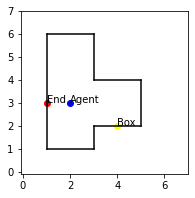

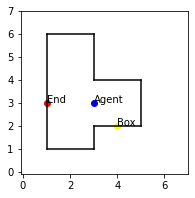

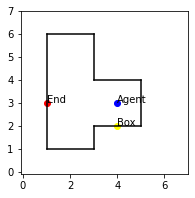

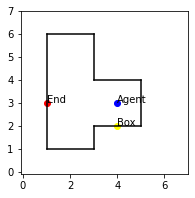

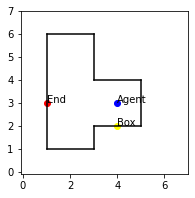

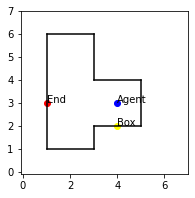

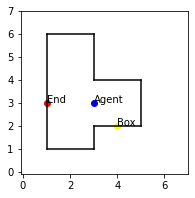

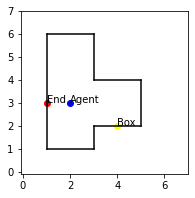

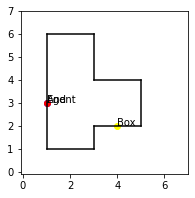

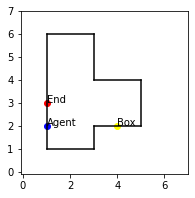

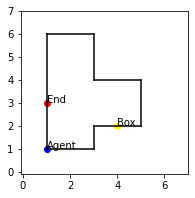

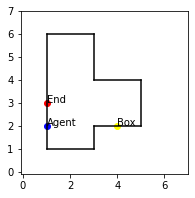

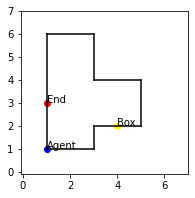

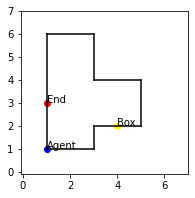

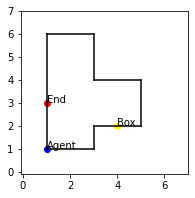

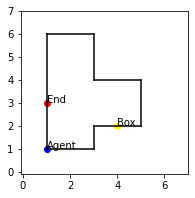

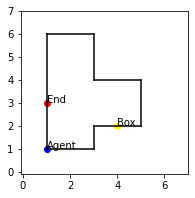

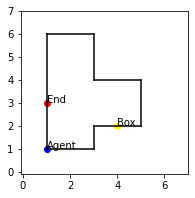

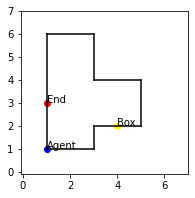

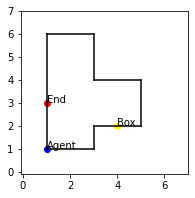

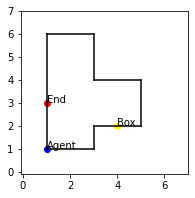

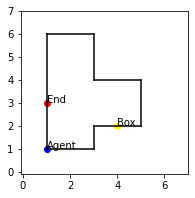

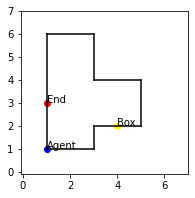

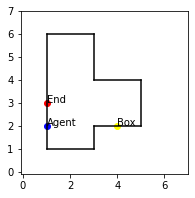

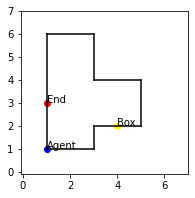

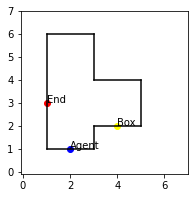

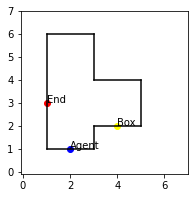

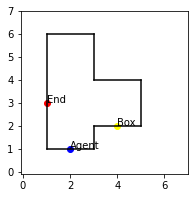

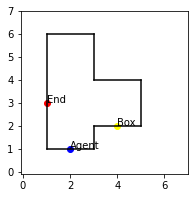

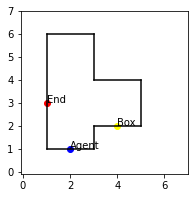

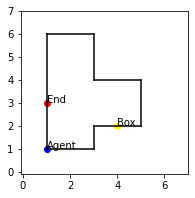

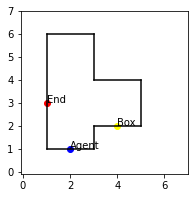

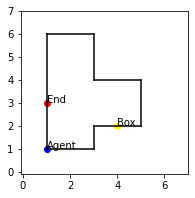

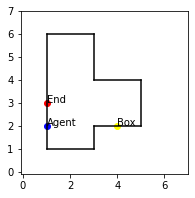

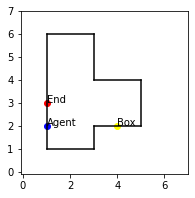

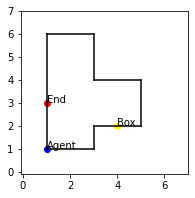

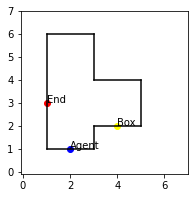

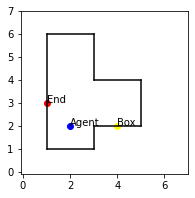

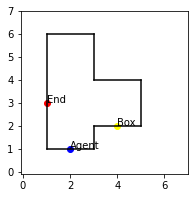

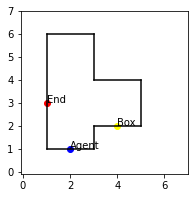

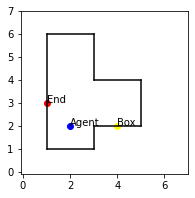

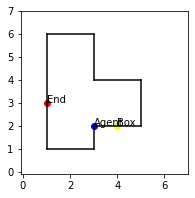

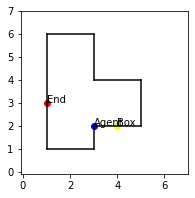

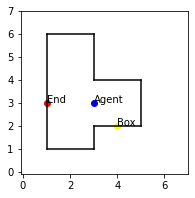

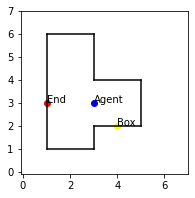

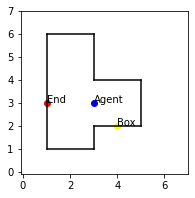

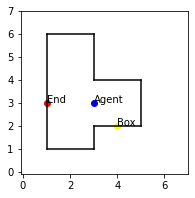

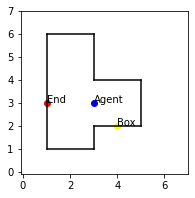

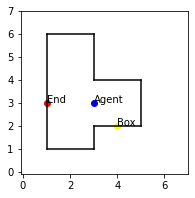

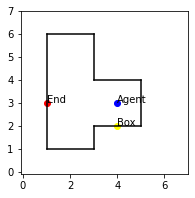

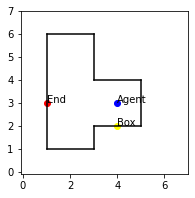

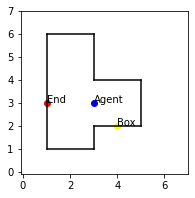

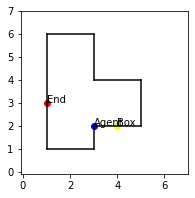

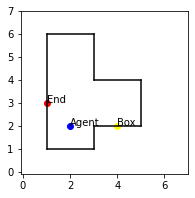

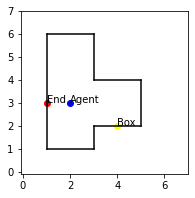

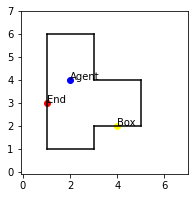

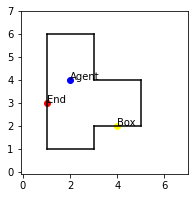

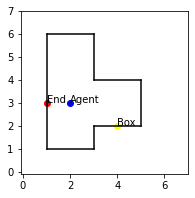

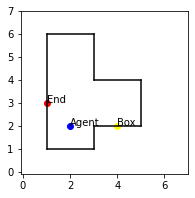

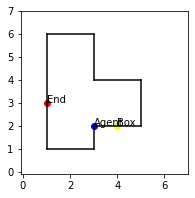

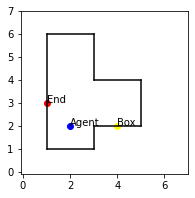

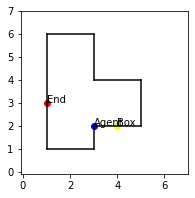

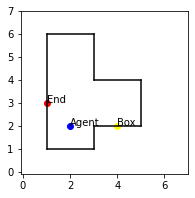

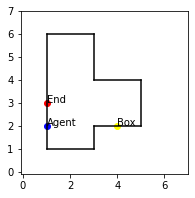

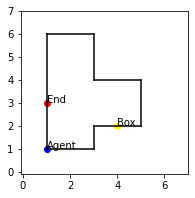

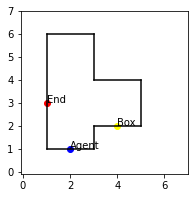

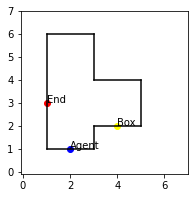

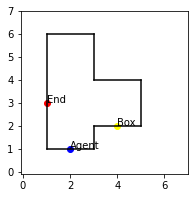

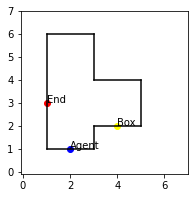

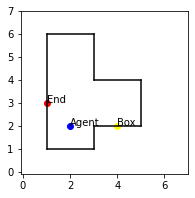

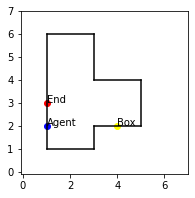

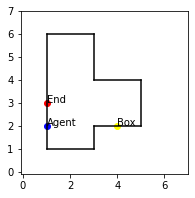

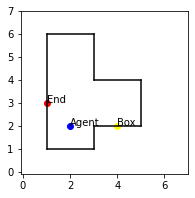

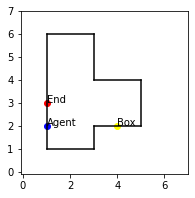

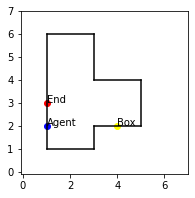

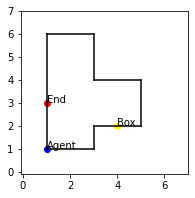

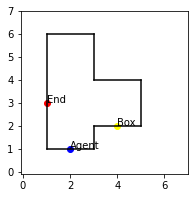

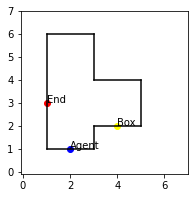

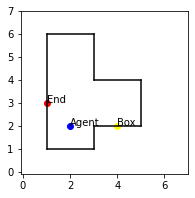

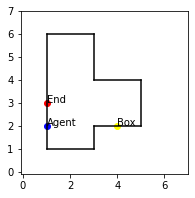

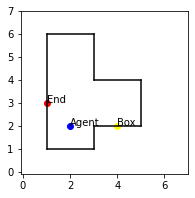

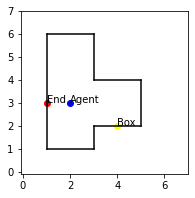

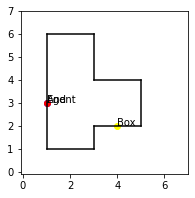

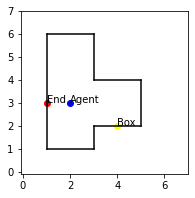

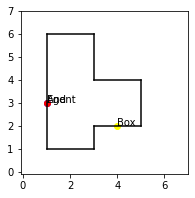

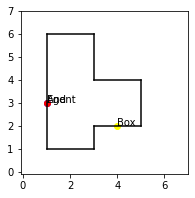

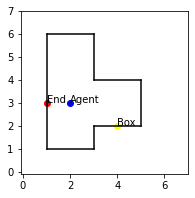

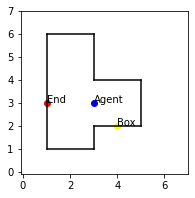

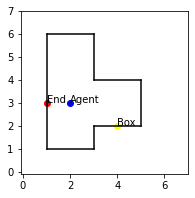

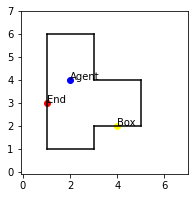

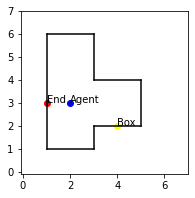

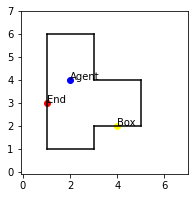

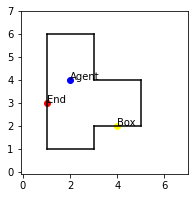

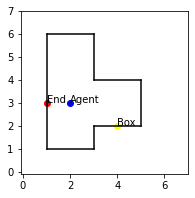

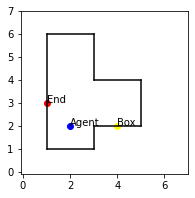

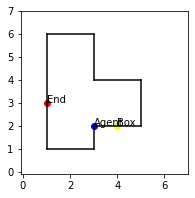

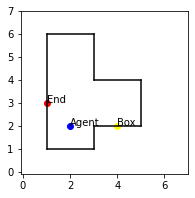

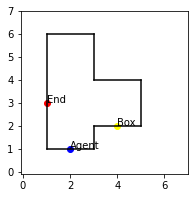

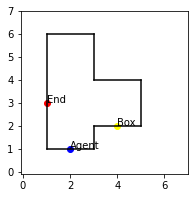

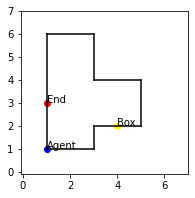

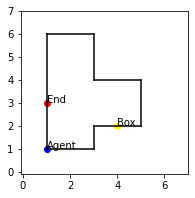

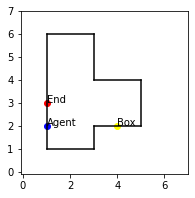

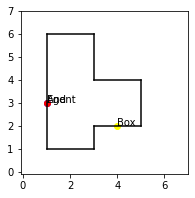

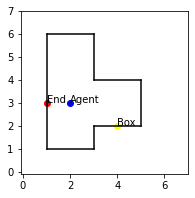

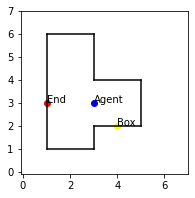

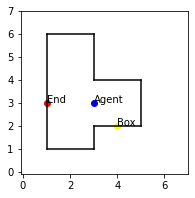

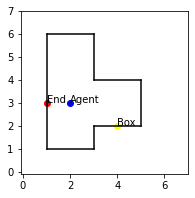

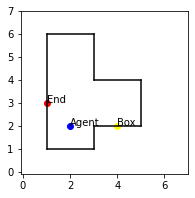

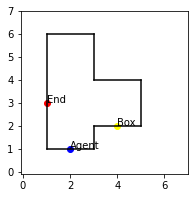

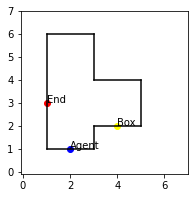

In [ ]:
done=False
i=1
while done==False:
  action=epsilon_greedy_policy(epsilon,state)
  state,reward,done=env.step(action)
  env.render()
  i+=1
  if i>200:
    break

Text(0, 0.5, 'Average Reward')

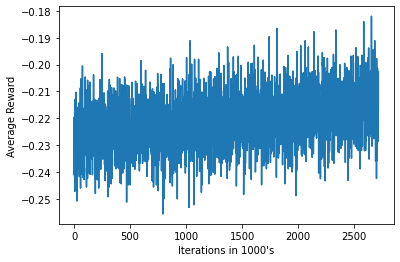

In [ ]:
plt.plot(plotter(rewards_plotting,1000))
plt.xlabel("Iterations in 1000's")
plt.ylabel("Average Reward")

# 4.Off-Policy TD Control (Q-Learning)

In [ ]:
states=(6,5)
actions=4
q=defaultdict(float)
for x in range(states[0]):
  for y in range(states[1]):
    for a in range(actions):
      q[(x,y,a)]=random.random()

In [ ]:
env=WarehouseAgent()
rewards_plotting=[]

In [ ]:
alpha=0.01
gamma=0.97
no_episodes=30000
epsilon=1.0

In [ ]:
for episode in range(no_episodes):
  state,done=env.reset()
  steps=0.0
  while done==False:
    action=epsilon_greedy_policy(epsilon*(1-episode/no_episodes),state)
    state,reward,done=env.step(action)
    next_state=env.agent_position
    q[(state[0],state[1],action)]+=alpha*(reward+gamma*(greedy_policy(next_state)-q[(state[0],state[1],action)]))
    steps+=1
    if steps>300:
      break
    rewards_plotting.append(reward)

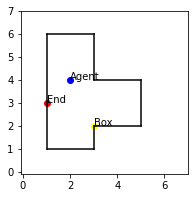

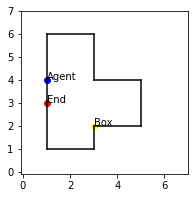

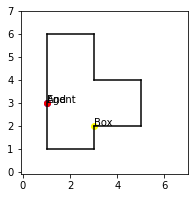

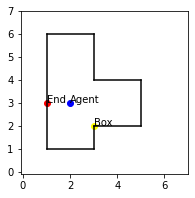

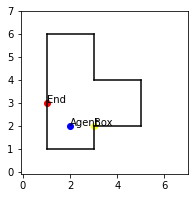

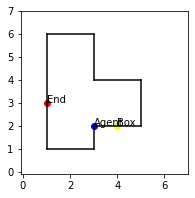

In [ ]:
env=WarehouseAgent()
state,done=env.reset()
while done==False:
  action=epsilon_greedy_policy(epsilon,state)
  state,reward,done=env.step(action)
  env.render()

Text(0, 0.5, 'Average Reward')

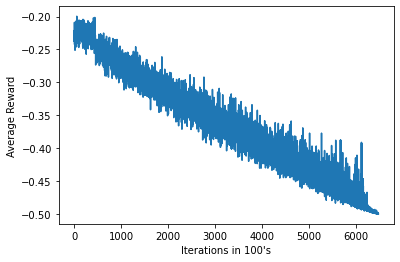

In [ ]:
plt.plot(plotter(rewards_plotting,1000))
plt.xlabel("Iterations in 100's")
plt.ylabel("Average Reward")

# 5. Policy Gradient Method

In [76]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision 

In [77]:
def sample_action(model,state):
  epsilon=0.4
  out=model(torch.Tensor(state))
  out=out.detach().numpy()
  if random.random()<epsilon:
    return np.argmax(out),max(out)
  else:
    action=random.sample([0,1,2,3],1)[0]
    return action,out[action]

In [78]:
random.sample([0,1,2,3],1)

[0]

In [79]:
def generate_episode(model,epsilon):
  states=[]
  rewards= torch.tensor([0.0], requires_grad=True)
  actions=[]
  state,done=env.reset()
  i=0
  gamma=0.97
  while done!=True:
    action,out=sample_action(model,state)
    actions.append(action)
    state,reward,done=env.step(action)
    next_action,next_q=sample_action(model,state)
    rewards=torch.add(rewards,reward)
    states.append(state)
    #print(out-reward+gamma*next_q)
    i+=1
    if i>200:
      break
  return states,actions,rewards

In [80]:
class Policy(nn.Module):
  def __init__(self,states,actions):
    super(Policy,self).__init__()
    self.model=nn.Sequential(
        nn.Linear(states,100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.Linear(50,actions),
        nn.ReLU()
    )
  def forward(self,input):
    out=self.model(input)
    return out

In [81]:
model=Policy(2,4)
epsilon=1.0
optimizer=optim.Adam(model.parameters(),lr=0.001)
env=WarehouseAgent()
state,done=env.reset()

In [82]:
rewards_plotting=[]

In [84]:
no_episodes=2000
for episode_no in range(no_episodes):
  epsilon=epsilon*0.99
  S,A,R=generate_episode(model,max(epsilon,0.3))
  #R=torch.Tensor(R,requires_grad=True)
  #total_rewards= torch.mean(R)
  optimizer.zero_grad()
  R.backward()
  optimizer.step()
  #print(R.item())
  rewards_plotting.append(R)

In [85]:
def epsilon_greedy_policy(model,epsilon,state):
  if random.random()<epsilon:
    return random.sample([0,1,2,3],1)[0]
  else:
    max=-1000000000
    max_index=0.0
    for i in q.keys():
      if (i[0]==state[0] and i[1]==state[1]):
        if np.real(q[i])>max:
          max=np.real(q[i])
          max_index=i[2]
    return max_index

[1 2] 2


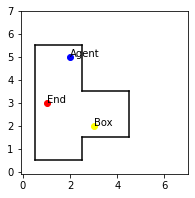

[1 2] 2


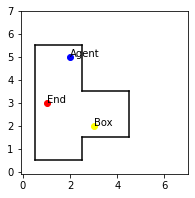

[1 2] 2


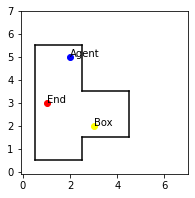

[1 2] 2


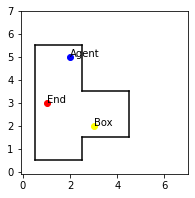

[1 2] 2


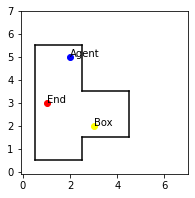

[1 2] 2


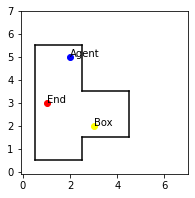

[1 2] 2


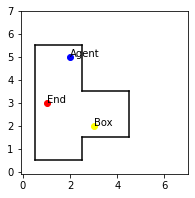

[1 2] 2


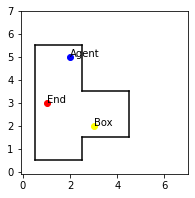

[1 2] 2


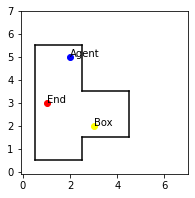

[1 2] 2


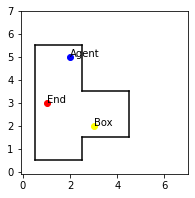

[1 2] 2


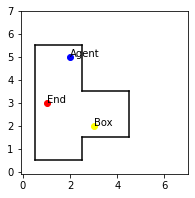

[1 2] 2


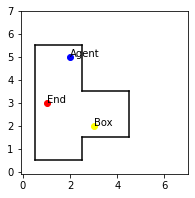

[1 2] 2


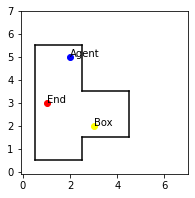

[1 2] 2


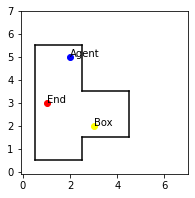

[1 2] 2


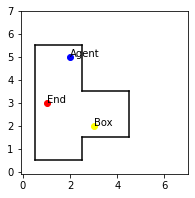

[1 2] 2


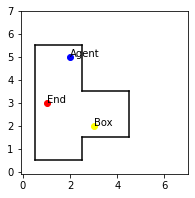

[1 2] 2


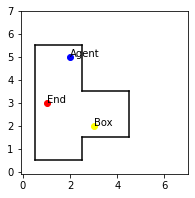

[1 2] 2


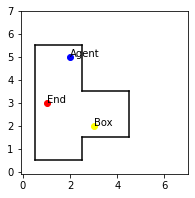

[1 2] 2


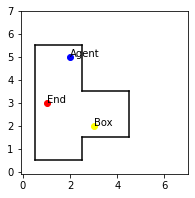

[1 2] 2


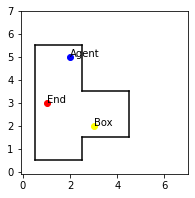

[1 2] 2


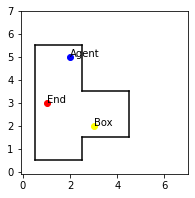

[1 2] 2


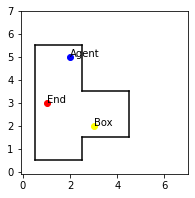

[1 2] 2


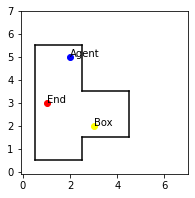

[1 2] 2


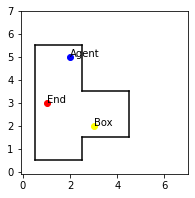

[1 2] 2


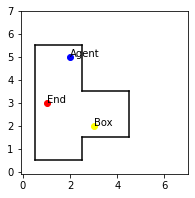

[1 2] 2


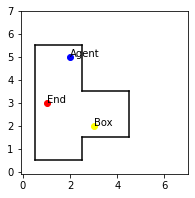

[1 2] 2


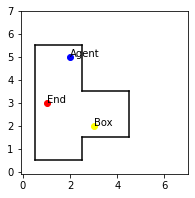

[1 2] 2


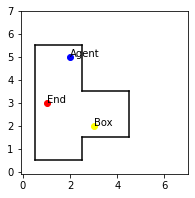

[1 2] 2


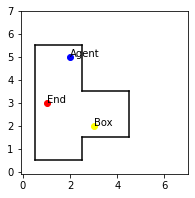

[1 2] 2


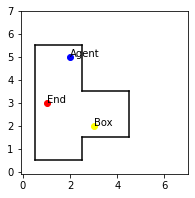

[1 2] 2


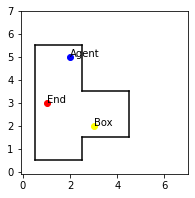

[1 2] 2


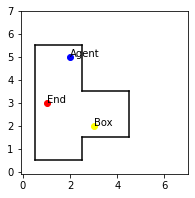

[1 2] 2


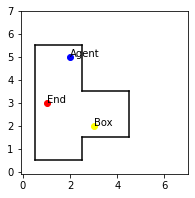

[1 2] 2


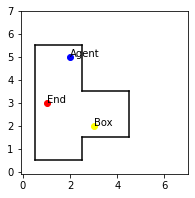

[1 2] 2


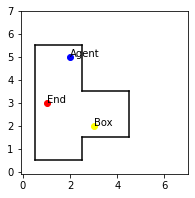

[1 2] 2


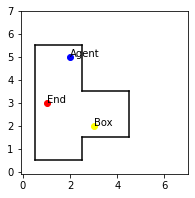

[1 2] 2


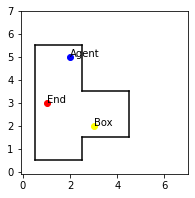

[1 2] 2


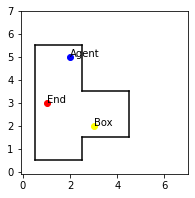

[1 2] 2


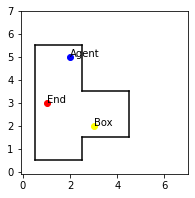

[1 2] 2


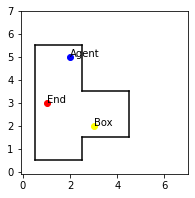

[1 2] 2


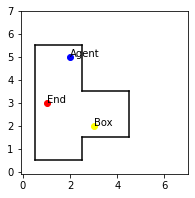

[1 2] 2


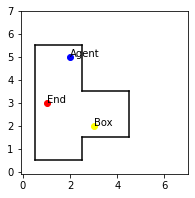

[1 2] 2


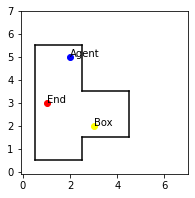

[1 2] 2


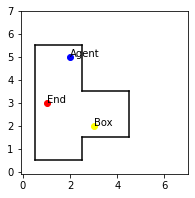

[1 2] 2


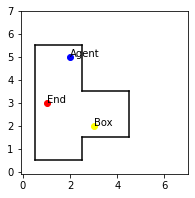

[1 2] 2


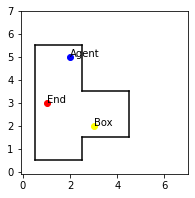

[1 2] 2


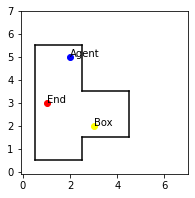

[1 2] 2


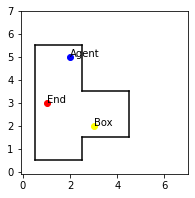

[1 2] 2


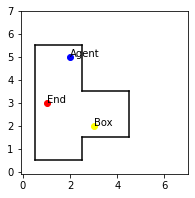

[1 2] 2


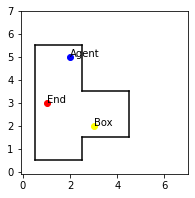

[1 2] 2


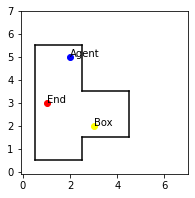

[1 2] 2


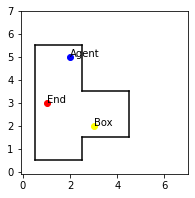

[1 2] 2


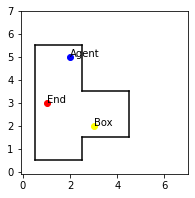

[1 2] 2


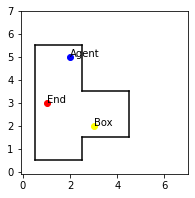

[1 2] 2


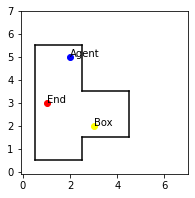

[1 2] 2


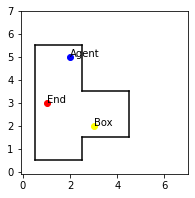

[1 2] 2


KeyboardInterrupt: ignored

<Figure size 216x216 with 0 Axes>

In [86]:
env=WarehouseAgent()
i=0
state,done=env.reset()
while done==False:
  action=torch.argmax(model(torch.Tensor(state))).item()
  state,reward,done=env.step(action)
  print(state,action)
  if done==True:
    break
  env.render()
  i+=1
  if i>100:
    break

In [87]:
model(torch.Tensor(state))

tensor([0.0438, 0.0000, 0.1450, 0.0000], grad_fn=<ReluBackward0>)

In [88]:
for i in range(len(rewards_plotting)):
  rewards_plotting[i]=rewards_plotting[i].item()

Text(0, 0.5, 'Average Reward')

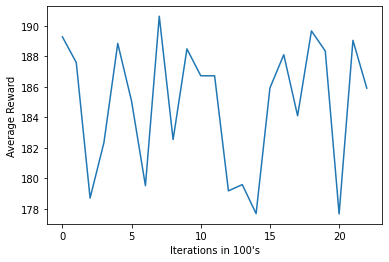

In [89]:
plt.plot(plotter(np.array(rewards_plotting)*-1,100))
plt.xlabel("Iterations in 100's")
plt.ylabel("Average Reward")

# Comment on the performance of each algorithm. Figure out the best performing algorithm and give necessary insights.

1. On-Policy Monte Carlo
2. Off-Policy Monte Carlo
3. On-Policy TD Control (SARSA)
4. Policy TD Control (Q-Learning)
5. Policy Gradient Method



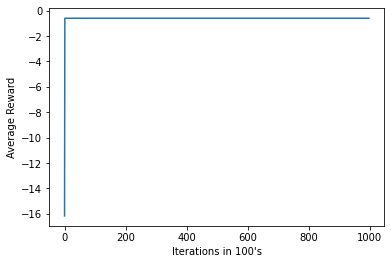

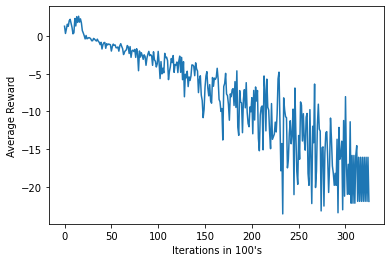

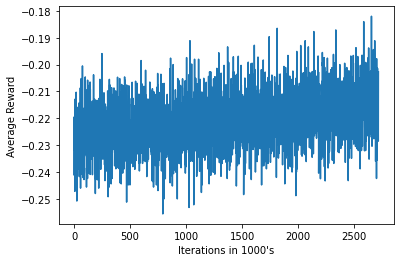

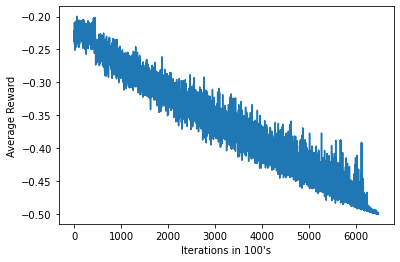

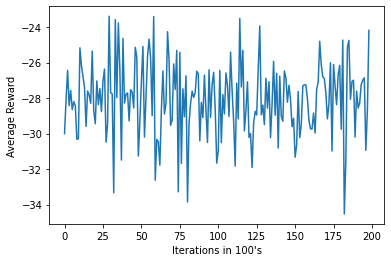





The best policy happens to be On-policy TD control as it has maximum average reward , polcy gradient is barely able to learn , it might be that it requires more iterations to converge. The MC methods arent able to move past (2,2) , wheras the TD methods laern to navigate but in the grid but not quite able to move the box to the goal location.In the gradient policy method a neural network is used as the policy with error being backpropagated as the reward got from the simulations , since are rewards for each step is negative this make sense to be backpropagated back into the network. In policy gradient the agent is stuck in a local minima. Both on and off every visit MC perform poorly.